In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df1 = pd.read_csv("A2Q1.csv")
df2 = pd.read_csv("A2Q2test.csv", header=None)
df2_test = pd.read_csv("A2Q2train.csv", header=None)

In [7]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.21302,0.446210,0.51432,0.219750,0.49544,0.46367,0.26007,0.28137,0.983820,0.00777,...,0.92910,0.28669,0.45841,0.788740,0.041794,0.58736,0.90491,0.91718,0.68321,2.0121
1,0.32563,0.703990,0.31970,0.045240,0.86968,0.13136,0.47664,0.26632,0.334520,0.81200,...,0.51868,0.25546,0.29498,0.008869,0.169970,0.92325,0.42134,0.90906,0.61539,1.8164
2,0.49539,0.623570,0.58121,0.879160,0.93096,0.20304,0.35752,0.31232,0.066225,0.46389,...,0.85782,0.50530,0.32361,0.693090,0.690430,0.01604,0.46741,0.67303,0.60459,1.6435
3,0.88875,0.013187,0.87982,0.858160,0.79392,0.79239,0.76522,0.85145,0.233610,0.57924,...,0.25535,0.38341,0.55130,0.727730,0.676890,0.84605,0.61116,0.58514,0.41724,2.7451
4,0.15178,0.540760,0.26896,0.006752,0.10102,0.34208,0.86855,0.32698,0.285460,0.80503,...,0.54955,0.12932,0.94848,0.326100,0.268010,0.27125,0.53535,0.91872,0.16801,1.8932


In [8]:
df2_test.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.58351,0.37939,0.83975,0.086861,0.61192,0.39203,0.189640,0.585090,0.89494,0.393850,...,0.51706,0.20535,0.829990,0.24995,0.31980,0.19674,0.958550,0.84948,0.92369,1.9741
1,0.86622,0.45135,0.93479,0.235810,0.50488,0.49742,0.117220,0.574880,0.71051,0.336890,...,0.27412,0.46065,0.655440,0.56656,0.49062,0.19920,0.320680,0.41419,0.83023,2.3354
2,0.39142,0.91995,0.13873,0.991810,0.54367,0.98449,0.340260,0.206470,0.40131,0.128990,...,0.27247,0.38911,0.799490,0.57753,0.86682,0.69741,0.628630,0.29479,0.54280,2.2053
3,0.79553,0.27854,0.22890,0.789290,0.49222,0.67084,0.769410,0.057104,0.20393,0.086936,...,0.24901,0.65976,0.943350,0.41246,0.92715,0.11015,0.101310,0.66801,0.34573,2.0400
4,0.65223,0.96665,0.17985,0.354060,0.84042,0.92891,0.014597,0.229530,0.43920,0.548940,...,0.93277,0.23674,0.027077,0.27111,0.23366,0.56356,0.047289,0.62792,0.97930,2.2053


In [9]:
df2.shape

(500, 101)

## Question 2

The analytical or closed-form solution for the least squares weight vector, $w_{ML}$, is found by solving the normal equation for $w$:

$$
w_{ML} = (X^{T} X)^{-1} X^{T} y
$$

This solution requires the matrix $(X^{T} X)$ to be invertible. If it's not invertible (i.e., it's a singular matrix), a unique analytical solution does not exist.


In [115]:
class LinReg():
    def __init__(self):
        self.w = None

    def Fit(self,Xo,Y, method = None ,regularize = None, alpha = 0.1, max_iter = 1000, lambda_ = 1, capture_cost = False, tol = 1e-6):
        X = Xo.copy()
        X.insert(0, "bias", 1)

        X = X.to_numpy()
        Y = Y.to_numpy().reshape(-1, 1)
        m = len(Y)
        
        if method == 'GD':
            n = X.shape[1]
            rng = np.random.default_rng()
            self.w = rng.standard_normal((n,1))
            self.w_history = []
            for _ in range(max_iter+1):
                y_pred = X @ self.w
                if capture_cost == True:
                    self.cost = np.sum((Y - y_pred)**2)
                    self.w_history.append(self.w.copy())
                self.diff = (1/m) * ((X.T @ (X @ self.w - Y)))
                self.reg = (lambda_/m) * self.w
                
                if regularize == "Ridge":
                    grad = self.diff + self.reg
                else:
                    grad = self.diff
                self.w = self.w - alpha * grad
                if len(self.w_history) > 1 and np.linalg.norm(self.w_history[-1] - self.w_history[-2]) < tol:
                    break

            if capture_cost == True:
                return self.w, self.w_history
            else:
                return self.w
        
        else:
            tra = X.T
            if np.linalg.det(tra @ X) == 0:
                raise ValueError("Singular Matrix")
            else:
                self.w = (np.linalg.inv(tra @ X)) @ tra @ Y
                return self.w
            
    def Test(self, X_test):
        if self.w is None:
            raise Exception("Training Not yet Done")
        else:
            X_test = X_test.copy()
            X_test.insert(0, "bias", 1)
            X_test = X_test.to_numpy()
            y_pred = X_test @ self.w
            return y_pred
    
    def Eval(self, Y_Pred, Y_test):
        
        Y_Pred = np.array(Y_Pred).reshape(-1)
        Y_test = np.array(Y_test).reshape(-1)

        meann = np.mean(Y_test)
        ss_res = np.sum((Y_test - Y_Pred)**2)
        ss_tot = np.sum((Y_test - meann)**2)

        R = 1 - (ss_res/ss_tot)
        return R

In [116]:
X_train = df2.iloc[:, 0:100]
Y_train = df2.iloc[:, 100]
X_test = df2_test.iloc[:, 0:100]
Y_test = df2_test.iloc[:, 100]

In [117]:
model = LinReg()

In [118]:
ws = model.Fit(X_train,Y_train)

In [119]:
predictions = model.Test(X_test)

In [120]:
R = model.Eval(predictions, Y_test)

In [121]:
R

np.float64(-0.5994543894485629)

In [122]:
X_train_std = (X_train - X_train.mean()) / X_train.std()

In [123]:
GDmodel = LinReg()
w, res = GDmodel.Fit(X_train_std, Y_train, method = 'GD', capture_cost = True)

In [124]:
GDpredictions = GDmodel.Test(X_test)

In [125]:
Gd_R = GDmodel.Eval(GDpredictions, Y_test)

In [126]:
Gd_R

np.float64(-1.4490522320726074)

In [127]:
norm = []
for wi in res:
    norm.append(np.linalg.norm(ws - wi))

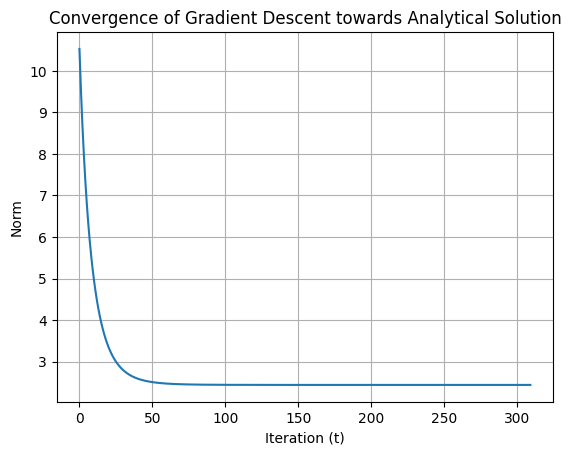

In [129]:
plt.plot(norm)
plt.xlabel("Iteration (t)")
plt.ylabel("Norm")
plt.title("Convergence of Gradient Descent towards Analytical Solution")
plt.grid(True)
plt.show()